In [1]:
import pandas as pd
import requests

# Get Data from Nobel Winners

Nobel in Wikidata:	Q37922

https://www.wikidata.org/wiki/Q37922

In [2]:
nobel_id = "Q37922"

In [3]:

url = 'https://query.wikidata.org/sparql'

query = '''
SELECT ?person ?personLabel ?award ?awardLabel ?date ?prizemoney ?forWork ?forWorkLabel ?genderLabel ?birthday ?birthplaceLabel
WHERE
{
# find a human
?person wdt:P31 wd:Q5 .
?person wdt:P166 wd:''' + nobel_id + '''.

?person p:P166 ?awardstatement .
?awardstatement ps:P166 ?award .


optional {?person wdt:P21 ?gender }.
optional {?person wdt:P569 ?birthday }.
optional {?person wdt:P19 ?birthplace }.

#?award rdfs:label "Nobel Prize in Literature"@en .
VALUES ?award {  wd:''' +nobel_id + ''' }.
optional {?awardstatement pq:P585 ?date}.
optional {?awardstatement pq:P2121 ?prizemoney}.
optional {?awardstatement pq:P1686 ?forWork }. # How to retrieve the currency?

SERVICE wikibase:label { bd:serviceParam wikibase:language "en,es" . }
}
ORDER BY ?date

'''
r = requests.get(url, params = {'format': 'json', 'query': query})
data = r.json()

nobel_prize_winners_df = pd.io.json.json_normalize(data['results']['bindings'])
nobel_prize_winners_df.to_csv("./../data/nobel_winners.tsv", sep="\t")


C:\Users\calvotello\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [4]:
nobel_prize_winners_df["personLabel.value"]

0            Sully Prudhomme
1            Theodor Mommsen
2      Bjørnstjerne Bjørnson
3           Frédéric Mistral
4             José Echegaray
               ...          
119           Kazuo Ishiguro
120           Olga Tokarczuk
121             Peter Handke
122             Louise Glück
123           Pungkula solav
Name: personLabel.value, Length: 124, dtype: object

In [5]:
nobel_prize_winners_df

,award.type,award.value,person.type,person.value,birthday.datatype,birthday.type,birthday.value,date.datatype,date.type,date.value,...,genderLabel.type,genderLabel.value,birthplaceLabel.xml:lang,birthplaceLabel.type,birthplaceLabel.value,forWork.type,forWork.value,forWorkLabel.xml:lang,forWorkLabel.type,forWorkLabel.value
0,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q42247,http://www.w3.org/2001/XMLSchema#dateTime,literal,1839-03-16T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,1901-01-01T00:00:00Z,...,literal,male,en,literal,Paris,NaN,NaN,NaN,NaN,NaN
1,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q25351,http://www.w3.org/2001/XMLSchema#dateTime,literal,1817-11-30T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,1902-01-01T00:00:00Z,...,literal,male,en,literal,Garding,uri,http://www.wikidata.org/entity/Q1500229,en,literal,History of Rome
2,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q46405,http://www.w3.org/2001/XMLSchema#dateTime,literal,1832-12-08T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,1903-01-01T00:00:00Z,...,literal,male,en,literal,Kvikne,NaN,NaN,NaN,NaN,NaN
3,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q42596,http://www.w3.org/2001/XMLSchema#dateTime,literal,1830-09-08T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,1904-01-01T00:00:00Z,...,literal,male,en,literal,Maillane,NaN,NaN,NaN,NaN,NaN
4,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q127349,http://www.w3.org/2001/XMLSchema#dateTime,literal,1832-04-19T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,1904-01-01T00:00:00Z,...,literal,male,en,literal,Madrid,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q272855,http://www.w3.org/2001/XMLSchema#dateTime,literal,1954-11-08T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,2017-01-01T00:00:00Z,...,literal,male,en,literal,Nagasaki,NaN,NaN,NaN,NaN,NaN
120,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q254032,http://www.w3.org/2001/XMLSchema#dateTime,literal,1962-01-29T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,2018-01-01T00:00:00Z,...,literal,female,en,literal,Sulechów,NaN,NaN,NaN,NaN,NaN
121,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q44107,http://www.w3.org/2001/XMLSchema#dateTime,literal,1942-12-06T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,2019-01-01T00:00:00Z,...,literal,male,en,literal,Griffen,NaN,NaN,NaN,NaN,NaN
122,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q2344210,http://www.w3.org/2001/XMLSchema#dateTime,literal,1943-04-22T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,2020-01-01T00:00:00Z,...,literal,female,en,literal,New York City,NaN,NaN,NaN,NaN,NaN


In [6]:
nobel_prize_winners_df.columns.tolist()

['award.type',
 'award.value',
 'person.type',
 'person.value',
 'birthday.datatype',
 'birthday.type',
 'birthday.value',
 'date.datatype',
 'date.type',
 'date.value',
 'prizemoney.datatype',
 'prizemoney.type',
 'prizemoney.value',
 'personLabel.xml:lang',
 'personLabel.type',
 'personLabel.value',
 'awardLabel.xml:lang',
 'awardLabel.type',
 'awardLabel.value',
 'genderLabel.xml:lang',
 'genderLabel.type',
 'genderLabel.value',
 'birthplaceLabel.xml:lang',
 'birthplaceLabel.type',
 'birthplaceLabel.value',
 'forWork.type',
 'forWork.value',
 'forWorkLabel.xml:lang',
 'forWorkLabel.type',
 'forWorkLabel.value']

In [7]:
nobel_prize_winners_df["wiki.id"] = nobel_prize_winners_df["person.value"].str.findall(".*?/(Q\d+)").str[0]

In [8]:
nobel_prize_winners_df

,award.type,award.value,person.type,person.value,birthday.datatype,birthday.type,birthday.value,date.datatype,date.type,date.value,...,genderLabel.value,birthplaceLabel.xml:lang,birthplaceLabel.type,birthplaceLabel.value,forWork.type,forWork.value,forWorkLabel.xml:lang,forWorkLabel.type,forWorkLabel.value,wiki.id
0,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q42247,http://www.w3.org/2001/XMLSchema#dateTime,literal,1839-03-16T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,1901-01-01T00:00:00Z,...,male,en,literal,Paris,NaN,NaN,NaN,NaN,NaN,Q42247
1,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q25351,http://www.w3.org/2001/XMLSchema#dateTime,literal,1817-11-30T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,1902-01-01T00:00:00Z,...,male,en,literal,Garding,uri,http://www.wikidata.org/entity/Q1500229,en,literal,History of Rome,Q25351
2,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q46405,http://www.w3.org/2001/XMLSchema#dateTime,literal,1832-12-08T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,1903-01-01T00:00:00Z,...,male,en,literal,Kvikne,NaN,NaN,NaN,NaN,NaN,Q46405
3,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q42596,http://www.w3.org/2001/XMLSchema#dateTime,literal,1830-09-08T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,1904-01-01T00:00:00Z,...,male,en,literal,Maillane,NaN,NaN,NaN,NaN,NaN,Q42596
4,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q127349,http://www.w3.org/2001/XMLSchema#dateTime,literal,1832-04-19T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,1904-01-01T00:00:00Z,...,male,en,literal,Madrid,NaN,NaN,NaN,NaN,NaN,Q127349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q272855,http://www.w3.org/2001/XMLSchema#dateTime,literal,1954-11-08T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,2017-01-01T00:00:00Z,...,male,en,literal,Nagasaki,NaN,NaN,NaN,NaN,NaN,Q272855
120,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q254032,http://www.w3.org/2001/XMLSchema#dateTime,literal,1962-01-29T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,2018-01-01T00:00:00Z,...,female,en,literal,Sulechów,NaN,NaN,NaN,NaN,NaN,Q254032
121,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q44107,http://www.w3.org/2001/XMLSchema#dateTime,literal,1942-12-06T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,2019-01-01T00:00:00Z,...,male,en,literal,Griffen,NaN,NaN,NaN,NaN,NaN,Q44107
122,uri,http://www.wikidata.org/entity/Q37922,uri,http://www.wikidata.org/entity/Q2344210,http://www.w3.org/2001/XMLSchema#dateTime,literal,1943-04-22T00:00:00Z,http://www.w3.org/2001/XMLSchema#dateTime,literal,2020-01-01T00:00:00Z,...,female,en,literal,New York City,NaN,NaN,NaN,NaN,NaN,Q2344210


In [9]:
nobel_prize_winners_df.to_csv("./../data/nobel_winners.tsv", sep="\t")

In [10]:
import time

In [11]:
i = 0

for index, row in nobel_prize_winners_df.iterrows():
    print(row["wiki.id"])
    

    url = 'https://query.wikidata.org/sparql'

    query = '''


            SELECT ?book ?bookLabel ?authorLabel ?linkCount ?article ?isb ?gndId ?ppn  ?publicationDate ?languageLabel WHERE { #?genreLabel
            
            bind(wd:''' + row["wiki.id"] + '''  as ?author)
            
            ?book wdt:P50 ?author. 

            ?book wikibase:sitelinks ?linkCount .
                ?article schema:about ?book .
                ?article schema:isPartOf <https://en.wikipedia.org/> .

            #OPTIONAL {?book wdt:P136 ?genre .}  
            OPTIONAL {?book wdt:P212 ?isbn .}    
            OPTIONAL {?book wdt:P227 ?gndId .}    
            OPTIONAL {?book wdt:P577 ?publicationDate .}
            OPTIONAL {?book wdt:P407 ?language .}
            OPTIONAL {?book wdt:P6721 ?ppn .}    
            
            SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
            }
            LIMIT 1000
    '''
    r = requests.get(url, params = {'format': 'json', 'query': query})
    data = r.json()

    publications_df = pd.io.json.json_normalize(data['results']['bindings'])

    if i == 0:
        publications_all_authors_df = publications_df.copy()
    else:
        publications_all_authors_df = pd.concat([publications_all_authors_df,publications_df])

            #results_df

    time.sleep(5)

    i += 1


Q42247


C:\Users\calvotello\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Q25351
Q46405
Q42596
Q127349
Q41502
Q43440
Q43440
Q34743
Q47695
Q44519
Q44519
Q76487
Q49747
Q43523
Q7241
Q47162
Q129173
Q225554
Q131487
Q226525
Q40826
Q40826
Q42443
Q83184
Q40213
Q121180
Q19185
Q7728
Q42156
Q80889
Q37030
Q123469
Q134641
Q82248
Q46602
Q1403
Q93157
Q129155
Q80900
Q132723
Q159552
Q80871
Q25973
Q47484
Q37767
Q38392
Q33760
Q93137
Q81685
Q8016
Q23434
Q80321
Q131318
Q34670
Q41223
Q83038
Q132684
Q47561
Q39212
Q165823
Q9364
Q42398
Q133042
Q57074
Q75603
Q43736
Q37327
Q34474
Q34189
Q42747
Q129187
Q131326
Q132695
Q83174
Q83059
Q134644
Q75612
Q75612
Q160478
Q45970
Q80064
Q5878
Q44183
Q102483
Q102483
Q131549
Q41488
Q862
Q7176
Q132589
Q46739
Q47619
Q132701
Q72334
Q80095
Q93356
Q42552
Q765
Q37060
Q37060
Q6538
Q18143
Q44593
Q47755
Q43293
Q47243
Q41042
Q241248
Q40874
Q42037
Q38049
Q39803
Q42122
Q8998
Q234819
Q222944
Q274334
Q392
Q272855
Q254032
Q44107
Q2344210
Q317877


In [12]:
publications_all_authors_df

,book.type,book.value,article.type,article.value,linkCount.datatype,linkCount.type,linkCount.value,gndId.type,gndId.value,publicationDate.datatype,...,publicationDate.value,bookLabel.xml:lang,bookLabel.type,bookLabel.value,authorLabel.xml:lang,authorLabel.type,authorLabel.value,languageLabel.xml:lang,languageLabel.type,languageLabel.value
0,uri,http://www.wikidata.org/entity/Q691007,uri,https://en.wikipedia.org/wiki/Corpus_Inscripti...,http://www.w3.org/2001/XMLSchema#integer,literal,22,literal,4222745-8,http://www.w3.org/2001/XMLSchema#dateTime,...,1861-01-01T00:00:00Z,en,literal,Corpus Inscriptionum Latinarum,en,literal,Theodor Mommsen,en,literal,Latin
1,uri,http://www.wikidata.org/entity/Q1500229,uri,https://en.wikipedia.org/wiki/History_of_Rome_...,http://www.w3.org/2001/XMLSchema#integer,literal,12,NaN,NaN,http://www.w3.org/2001/XMLSchema#dateTime,...,1854-01-01T00:00:00Z,en,literal,History of Rome,en,literal,Theodor Mommsen,en,literal,German
0,uri,http://www.wikidata.org/entity/Q2421868,uri,https://en.wikipedia.org/wiki/Synn%C3%B8ve_Sol...,http://www.w3.org/2001/XMLSchema#integer,literal,10,NaN,NaN,http://www.w3.org/2001/XMLSchema#dateTime,...,1857-01-01T00:00:00Z,en,literal,Synnøve Solbakken,en,literal,Bjørnstjerne Bjørnson,en,literal,Norwegian
1,uri,http://www.wikidata.org/entity/Q11967371,uri,https://en.wikipedia.org/wiki/En_fallit,http://www.w3.org/2001/XMLSchema#integer,literal,3,NaN,NaN,http://www.w3.org/2001/XMLSchema#dateTime,...,1875-01-01T00:00:00Z,en,literal,En fallit,en,literal,Bjørnstjerne Bjørnson,en,literal,Norwegian
2,uri,http://www.wikidata.org/entity/Q11967394,uri,https://en.wikipedia.org/wiki/En_glad_Gut,http://www.w3.org/2001/XMLSchema#integer,literal,3,NaN,NaN,http://www.w3.org/2001/XMLSchema#dateTime,...,1860-01-01T00:00:00Z,en,literal,En glad gut,en,literal,Bjørnstjerne Bjørnson,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,uri,http://www.wikidata.org/entity/Q108830528,uri,https://en.wikipedia.org/wiki/Afterlives,http://www.w3.org/2001/XMLSchema#integer,literal,4,NaN,NaN,NaN,...,NaN,en,literal,Afterlives,en,literal,Pungkula solav,NaN,NaN,NaN
6,uri,http://www.wikidata.org/entity/Q108837890,uri,https://en.wikipedia.org/wiki/Pilgrims_Way_(no...,http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,http://www.w3.org/2001/XMLSchema#dateTime,...,1988-01-01T00:00:00Z,en,literal,Pilgrims Way,en,literal,Pungkula solav,NaN,NaN,NaN
7,uri,http://www.wikidata.org/entity/Q108837913,uri,https://en.wikipedia.org/wiki/Admiring_Silence,http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,http://www.w3.org/2001/XMLSchema#dateTime,...,1996-11-01T00:00:00Z,en,literal,Admiring Silence,en,literal,Pungkula solav,en,literal,English
8,uri,http://www.wikidata.org/entity/Q108839999,uri,https://en.wikipedia.org/wiki/Dottie_(novel),http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,http://www.w3.org/2001/XMLSchema#dateTime,...,1990-01-01T00:00:00Z,en,literal,Dottie,en,literal,Pungkula solav,en,literal,English


In [13]:
publications_all_authors_df.columns.tolist()

['book.type',
 'book.value',
 'article.type',
 'article.value',
 'linkCount.datatype',
 'linkCount.type',
 'linkCount.value',
 'gndId.type',
 'gndId.value',
 'publicationDate.datatype',
 'publicationDate.type',
 'publicationDate.value',
 'bookLabel.xml:lang',
 'bookLabel.type',
 'bookLabel.value',
 'authorLabel.xml:lang',
 'authorLabel.type',
 'authorLabel.value',
 'languageLabel.xml:lang',
 'languageLabel.type',
 'languageLabel.value']

In [14]:
publications_all_authors_df.columns.tolist()

['book.type',
 'book.value',
 'article.type',
 'article.value',
 'linkCount.datatype',
 'linkCount.type',
 'linkCount.value',
 'gndId.type',
 'gndId.value',
 'publicationDate.datatype',
 'publicationDate.type',
 'publicationDate.value',
 'bookLabel.xml:lang',
 'bookLabel.type',
 'bookLabel.value',
 'authorLabel.xml:lang',
 'authorLabel.type',
 'authorLabel.value',
 'languageLabel.xml:lang',
 'languageLabel.type',
 'languageLabel.value']

In [16]:
publications_all_authors_df[['book.value',
 'linkCount.value',
 'gndId.value',
 'publicationDate.value',
 'bookLabel.xml:lang',
 'bookLabel.value',
 'authorLabel.xml:lang',
 'authorLabel.value',
 'languageLabel.xml:lang',
 'languageLabel.value',
]]

,book.value,linkCount.value,gndId.value,publicationDate.value,bookLabel.xml:lang,bookLabel.value,authorLabel.xml:lang,authorLabel.value,languageLabel.xml:lang,languageLabel.value
0,http://www.wikidata.org/entity/Q691007,22,4222745-8,1861-01-01T00:00:00Z,en,Corpus Inscriptionum Latinarum,en,Theodor Mommsen,en,Latin
1,http://www.wikidata.org/entity/Q1500229,12,NaN,1854-01-01T00:00:00Z,en,History of Rome,en,Theodor Mommsen,en,German
0,http://www.wikidata.org/entity/Q2421868,10,NaN,1857-01-01T00:00:00Z,en,Synnøve Solbakken,en,Bjørnstjerne Bjørnson,en,Norwegian
1,http://www.wikidata.org/entity/Q11967371,3,NaN,1875-01-01T00:00:00Z,en,En fallit,en,Bjørnstjerne Bjørnson,en,Norwegian
2,http://www.wikidata.org/entity/Q11967394,3,NaN,1860-01-01T00:00:00Z,en,En glad gut,en,Bjørnstjerne Bjørnson,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5,http://www.wikidata.org/entity/Q108830528,4,NaN,NaN,en,Afterlives,en,Pungkula solav,NaN,NaN
6,http://www.wikidata.org/entity/Q108837890,2,NaN,1988-01-01T00:00:00Z,en,Pilgrims Way,en,Pungkula solav,NaN,NaN
7,http://www.wikidata.org/entity/Q108837913,2,NaN,1996-11-01T00:00:00Z,en,Admiring Silence,en,Pungkula solav,en,English
8,http://www.wikidata.org/entity/Q108839999,2,NaN,1990-01-01T00:00:00Z,en,Dottie,en,Pungkula solav,en,English


In [17]:
publications_all_authors_df.reset_index(inplace=True)


In [18]:
publications_all_authors_df

,index,book.type,book.value,article.type,article.value,linkCount.datatype,linkCount.type,linkCount.value,gndId.type,gndId.value,...,publicationDate.value,bookLabel.xml:lang,bookLabel.type,bookLabel.value,authorLabel.xml:lang,authorLabel.type,authorLabel.value,languageLabel.xml:lang,languageLabel.type,languageLabel.value
0,0,uri,http://www.wikidata.org/entity/Q691007,uri,https://en.wikipedia.org/wiki/Corpus_Inscripti...,http://www.w3.org/2001/XMLSchema#integer,literal,22,literal,4222745-8,...,1861-01-01T00:00:00Z,en,literal,Corpus Inscriptionum Latinarum,en,literal,Theodor Mommsen,en,literal,Latin
1,1,uri,http://www.wikidata.org/entity/Q1500229,uri,https://en.wikipedia.org/wiki/History_of_Rome_...,http://www.w3.org/2001/XMLSchema#integer,literal,12,NaN,NaN,...,1854-01-01T00:00:00Z,en,literal,History of Rome,en,literal,Theodor Mommsen,en,literal,German
2,0,uri,http://www.wikidata.org/entity/Q2421868,uri,https://en.wikipedia.org/wiki/Synn%C3%B8ve_Sol...,http://www.w3.org/2001/XMLSchema#integer,literal,10,NaN,NaN,...,1857-01-01T00:00:00Z,en,literal,Synnøve Solbakken,en,literal,Bjørnstjerne Bjørnson,en,literal,Norwegian
3,1,uri,http://www.wikidata.org/entity/Q11967371,uri,https://en.wikipedia.org/wiki/En_fallit,http://www.w3.org/2001/XMLSchema#integer,literal,3,NaN,NaN,...,1875-01-01T00:00:00Z,en,literal,En fallit,en,literal,Bjørnstjerne Bjørnson,en,literal,Norwegian
4,2,uri,http://www.wikidata.org/entity/Q11967394,uri,https://en.wikipedia.org/wiki/En_glad_Gut,http://www.w3.org/2001/XMLSchema#integer,literal,3,NaN,NaN,...,1860-01-01T00:00:00Z,en,literal,En glad gut,en,literal,Bjørnstjerne Bjørnson,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,5,uri,http://www.wikidata.org/entity/Q108830528,uri,https://en.wikipedia.org/wiki/Afterlives,http://www.w3.org/2001/XMLSchema#integer,literal,4,NaN,NaN,...,NaN,en,literal,Afterlives,en,literal,Pungkula solav,NaN,NaN,NaN
1572,6,uri,http://www.wikidata.org/entity/Q108837890,uri,https://en.wikipedia.org/wiki/Pilgrims_Way_(no...,http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,...,1988-01-01T00:00:00Z,en,literal,Pilgrims Way,en,literal,Pungkula solav,NaN,NaN,NaN
1573,7,uri,http://www.wikidata.org/entity/Q108837913,uri,https://en.wikipedia.org/wiki/Admiring_Silence,http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,...,1996-11-01T00:00:00Z,en,literal,Admiring Silence,en,literal,Pungkula solav,en,literal,English
1574,8,uri,http://www.wikidata.org/entity/Q108839999,uri,https://en.wikipedia.org/wiki/Dottie_(novel),http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,...,1990-01-01T00:00:00Z,en,literal,Dottie,en,literal,Pungkula solav,en,literal,English


In [19]:
publications_all_authors_df["linkCount.value"] = publications_all_authors_df["linkCount.value"].astype(int)

In [20]:
publications_all_authors_df.to_csv("./../data/publications_nobel.tsv", sep="\t")

In [21]:
publications_all_authors_df.sort_values(by="linkCount.value",ascending=False).head(20)

,index,book.type,book.value,article.type,article.value,linkCount.datatype,linkCount.type,linkCount.value,gndId.type,gndId.value,...,publicationDate.value,bookLabel.xml:lang,bookLabel.type,bookLabel.value,authorLabel.xml:lang,authorLabel.type,authorLabel.value,languageLabel.xml:lang,languageLabel.type,languageLabel.value
1009,0,uri,http://www.wikidata.org/entity/Q178869,uri,https://en.wikipedia.org/wiki/One_Hundred_Year...,http://www.w3.org/2001/XMLSchema#integer,literal,83,literal,4123253-7,...,1967-01-01T00:00:00Z,en,literal,One Hundred Years of Solitude,en,literal,Gabriel García Márquez,en,literal,Spanish
610,3,uri,http://www.wikidata.org/entity/Q26505,uri,https://en.wikipedia.org/wiki/The_Old_Man_and_...,http://www.w3.org/2001/XMLSchema#integer,literal,78,literal,4099230-5,...,1952-01-01T00:00:00Z,en,literal,The Old Man and the Sea,en,literal,Ernest Hemingway,en,literal,English
682,0,uri,http://www.wikidata.org/entity/Q163297,uri,https://en.wikipedia.org/wiki/The_Stranger_(Ca...,http://www.w3.org/2001/XMLSchema#integer,literal,72,literal,4236814-5,...,NaN,en,literal,L'Étranger,en,literal,Albert Camus,en,literal,French
23,0,uri,http://www.wikidata.org/entity/Q189509,uri,https://en.wikipedia.org/wiki/The_Jungle_Book,http://www.w3.org/2001/XMLSchema#integer,literal,67,literal,4326028-7,...,1894-01-01T00:00:00Z,en,literal,The Jungle Book,en,literal,Rudyard Kipling,en,literal,English
808,1,uri,http://www.wikidata.org/entity/Q19871,uri,https://en.wikipedia.org/wiki/Waiting_for_Godot,http://www.w3.org/2001/XMLSchema#integer,literal,64,literal,4201228-4,...,1952-01-01T00:00:00Z,en,literal,Waiting for Godot,en,literal,Samuel Beckett,en,literal,Welsh
807,0,uri,http://www.wikidata.org/entity/Q19871,uri,https://en.wikipedia.org/wiki/Waiting_for_Godot,http://www.w3.org/2001/XMLSchema#integer,literal,64,literal,4201228-4,...,1952-01-01T00:00:00Z,en,literal,Waiting for Godot,en,literal,Samuel Beckett,en,literal,French
611,4,uri,http://www.wikidata.org/entity/Q200920,uri,https://en.wikipedia.org/wiki/For_Whom_the_Bel...,http://www.w3.org/2001/XMLSchema#integer,literal,59,literal,4099229-9,...,1940-10-21T00:00:00Z,en,literal,For Whom the Bell Tolls,en,literal,Ernest Hemingway,en,literal,English
684,2,uri,http://www.wikidata.org/entity/Q320372,uri,https://en.wikipedia.org/wiki/The_Plague_(novel),http://www.w3.org/2001/XMLSchema#integer,literal,55,literal,4131560-1,...,1947-06-01T00:00:00Z,en,literal,The Plague,en,literal,Albert Camus,en,literal,French
713,0,uri,http://www.wikidata.org/entity/Q215983,uri,https://en.wikipedia.org/wiki/The_Grapes_of_Wrath,http://www.w3.org/2001/XMLSchema#integer,literal,53,literal,4305432-8,...,1939-04-14T00:00:00Z,en,literal,The Grapes of Wrath,en,literal,John Steinbeck,en,literal,English
1031,0,uri,http://www.wikidata.org/entity/Q271764,uri,https://en.wikipedia.org/wiki/Lord_of_the_Flies,http://www.w3.org/2001/XMLSchema#integer,literal,52,literal,4123300-1,...,1954-09-18T00:00:00Z,en,literal,Lord of the Flies,en,literal,William Golding,en,literal,English


In [22]:
publications_all_authors_df["last_section_surname"] = publications_all_authors_df["authorLabel.value"].str.findall(r".+ (.+)$").str[0]

In [23]:
publications_all_authors_df

,index,book.type,book.value,article.type,article.value,linkCount.datatype,linkCount.type,linkCount.value,gndId.type,gndId.value,...,bookLabel.xml:lang,bookLabel.type,bookLabel.value,authorLabel.xml:lang,authorLabel.type,authorLabel.value,languageLabel.xml:lang,languageLabel.type,languageLabel.value,last_section_surname
0,0,uri,http://www.wikidata.org/entity/Q691007,uri,https://en.wikipedia.org/wiki/Corpus_Inscripti...,http://www.w3.org/2001/XMLSchema#integer,literal,22,literal,4222745-8,...,en,literal,Corpus Inscriptionum Latinarum,en,literal,Theodor Mommsen,en,literal,Latin,Mommsen
1,1,uri,http://www.wikidata.org/entity/Q1500229,uri,https://en.wikipedia.org/wiki/History_of_Rome_...,http://www.w3.org/2001/XMLSchema#integer,literal,12,NaN,NaN,...,en,literal,History of Rome,en,literal,Theodor Mommsen,en,literal,German,Mommsen
2,0,uri,http://www.wikidata.org/entity/Q2421868,uri,https://en.wikipedia.org/wiki/Synn%C3%B8ve_Sol...,http://www.w3.org/2001/XMLSchema#integer,literal,10,NaN,NaN,...,en,literal,Synnøve Solbakken,en,literal,Bjørnstjerne Bjørnson,en,literal,Norwegian,Bjørnson
3,1,uri,http://www.wikidata.org/entity/Q11967371,uri,https://en.wikipedia.org/wiki/En_fallit,http://www.w3.org/2001/XMLSchema#integer,literal,3,NaN,NaN,...,en,literal,En fallit,en,literal,Bjørnstjerne Bjørnson,en,literal,Norwegian,Bjørnson
4,2,uri,http://www.wikidata.org/entity/Q11967394,uri,https://en.wikipedia.org/wiki/En_glad_Gut,http://www.w3.org/2001/XMLSchema#integer,literal,3,NaN,NaN,...,en,literal,En glad gut,en,literal,Bjørnstjerne Bjørnson,NaN,NaN,NaN,Bjørnson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,5,uri,http://www.wikidata.org/entity/Q108830528,uri,https://en.wikipedia.org/wiki/Afterlives,http://www.w3.org/2001/XMLSchema#integer,literal,4,NaN,NaN,...,en,literal,Afterlives,en,literal,Pungkula solav,NaN,NaN,NaN,solav
1572,6,uri,http://www.wikidata.org/entity/Q108837890,uri,https://en.wikipedia.org/wiki/Pilgrims_Way_(no...,http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,...,en,literal,Pilgrims Way,en,literal,Pungkula solav,NaN,NaN,NaN,solav
1573,7,uri,http://www.wikidata.org/entity/Q108837913,uri,https://en.wikipedia.org/wiki/Admiring_Silence,http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,...,en,literal,Admiring Silence,en,literal,Pungkula solav,en,literal,English,solav
1574,8,uri,http://www.wikidata.org/entity/Q108839999,uri,https://en.wikipedia.org/wiki/Dottie_(novel),http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,...,en,literal,Dottie,en,literal,Pungkula solav,en,literal,English,solav


In [24]:
import os
import sys
sys.path.append(os.path.abspath("./../../../code/"))

In [25]:
from fachreferats_functions import check_duplicates, extract_data, clean_data



In [26]:
publications_all_authors_df = check_duplicates.check_duplicate_with_title(publications_all_authors_df, name_column_title='bookLabel.value' )

In [27]:
publications_all_authors_df = check_duplicates.check_duplicate_with_title_author(publications_all_authors_df, name_column_title='bookLabel.value', name_column_author = "last_section_surname")

In [28]:
publications_all_authors_df

,index,book.type,book.value,article.type,article.value,linkCount.datatype,linkCount.type,linkCount.value,gndId.type,gndId.value,...,last_section_surname,nach_bookLabel.value_Bestand_Göttingen,nach_bookLabel.value_Ort_Göttingen,nach_bookLabel.value_Medium_Göttingen,nach_bookLabel.value_URL_GUK,error_nach_title,nach_bookLabel.value_last_section_surname_Bestand_Göttingen,nach_bookLabel.value_last_section_surname_Ort_Göttingen,nach_bookLabel.value_last_section_surname_Medium_Göttingen,nach_bookLabel.value_last_section_surname_URL_GUK
0,0,uri,http://www.wikidata.org/entity/Q691007,uri,https://en.wikipedia.org/wiki/Corpus_Inscripti...,http://www.w3.org/2001/XMLSchema#integer,literal,22,literal,4222745-8,...,Mommsen,136,BBK-ALTH|7/023,AFu|AFua|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,18,7/021|7/155,AFu|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...
1,1,uri,http://www.wikidata.org/entity/Q1500229,uri,https://en.wikipedia.org/wiki/History_of_Rome_...,http://www.w3.org/2001/XMLSchema#integer,literal,12,NaN,NaN,...,Mommsen,806,BBK-KLASS|FMAG|7/021|7/041|LS1,AFu|Aau|Oau|Afu|Aax,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...
2,0,uri,http://www.wikidata.org/entity/Q2421868,uri,https://en.wikipedia.org/wiki/Synn%C3%B8ve_Sol...,http://www.w3.org/2001/XMLSchema#integer,literal,10,NaN,NaN,...,Bjørnson,6,7/138|HG-MAG,AFu|Aau|Aar|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,5,7/138|HG-MAG,AFu|Aau|Aar|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...
3,1,uri,http://www.wikidata.org/entity/Q11967371,uri,https://en.wikipedia.org/wiki/En_fallit,http://www.w3.org/2001/XMLSchema#integer,literal,3,NaN,NaN,...,Bjørnson,3,7/138,AFu|Afr|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,3,7/138,AFu|Afr|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...
4,2,uri,http://www.wikidata.org/entity/Q11967394,uri,https://en.wikipedia.org/wiki/En_glad_Gut,http://www.w3.org/2001/XMLSchema#integer,literal,3,NaN,NaN,...,Bjørnson,3,7/138|HG-MAG,AFu|Aar|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,3,7/138|HG-MAG,AFu|Aar|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,5,uri,http://www.wikidata.org/entity/Q108830528,uri,https://en.wikipedia.org/wiki/Afterlives,http://www.w3.org/2001/XMLSchema#integer,literal,4,NaN,NaN,...,solav,56,BBK-HIST|ALS1|FMAG,Aax|Aau|Oax,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...
1572,6,uri,http://www.wikidata.org/entity/Q108837890,uri,https://en.wikipedia.org/wiki/Pilgrims_Way_(no...,http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,...,solav,20,7/066,Eaxkr|Aan|Aar|Aau|Oaxkr|Oaxkf|Oax,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...
1573,7,uri,http://www.wikidata.org/entity/Q108837913,uri,https://en.wikipedia.org/wiki/Admiring_Silence,http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,...,solav,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...
1574,8,uri,http://www.wikidata.org/entity/Q108839999,uri,https://en.wikipedia.org/wiki/Dottie_(novel),http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,...,solav,1,,Ean,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...


In [29]:
publications_all_authors_df

,index,book.type,book.value,article.type,article.value,linkCount.datatype,linkCount.type,linkCount.value,gndId.type,gndId.value,...,last_section_surname,nach_bookLabel.value_Bestand_Göttingen,nach_bookLabel.value_Ort_Göttingen,nach_bookLabel.value_Medium_Göttingen,nach_bookLabel.value_URL_GUK,error_nach_title,nach_bookLabel.value_last_section_surname_Bestand_Göttingen,nach_bookLabel.value_last_section_surname_Ort_Göttingen,nach_bookLabel.value_last_section_surname_Medium_Göttingen,nach_bookLabel.value_last_section_surname_URL_GUK
0,0,uri,http://www.wikidata.org/entity/Q691007,uri,https://en.wikipedia.org/wiki/Corpus_Inscripti...,http://www.w3.org/2001/XMLSchema#integer,literal,22,literal,4222745-8,...,Mommsen,136,BBK-ALTH|7/023,AFu|AFua|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,18,7/021|7/155,AFu|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...
1,1,uri,http://www.wikidata.org/entity/Q1500229,uri,https://en.wikipedia.org/wiki/History_of_Rome_...,http://www.w3.org/2001/XMLSchema#integer,literal,12,NaN,NaN,...,Mommsen,806,BBK-KLASS|FMAG|7/021|7/041|LS1,AFu|Aau|Oau|Afu|Aax,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...
2,0,uri,http://www.wikidata.org/entity/Q2421868,uri,https://en.wikipedia.org/wiki/Synn%C3%B8ve_Sol...,http://www.w3.org/2001/XMLSchema#integer,literal,10,NaN,NaN,...,Bjørnson,6,7/138|HG-MAG,AFu|Aau|Aar|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,5,7/138|HG-MAG,AFu|Aau|Aar|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...
3,1,uri,http://www.wikidata.org/entity/Q11967371,uri,https://en.wikipedia.org/wiki/En_fallit,http://www.w3.org/2001/XMLSchema#integer,literal,3,NaN,NaN,...,Bjørnson,3,7/138,AFu|Afr|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,3,7/138,AFu|Afr|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...
4,2,uri,http://www.wikidata.org/entity/Q11967394,uri,https://en.wikipedia.org/wiki/En_glad_Gut,http://www.w3.org/2001/XMLSchema#integer,literal,3,NaN,NaN,...,Bjørnson,3,7/138|HG-MAG,AFu|Aar|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,3,7/138|HG-MAG,AFu|Aar|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,5,uri,http://www.wikidata.org/entity/Q108830528,uri,https://en.wikipedia.org/wiki/Afterlives,http://www.w3.org/2001/XMLSchema#integer,literal,4,NaN,NaN,...,solav,56,BBK-HIST|ALS1|FMAG,Aax|Aau|Oax,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...
1572,6,uri,http://www.wikidata.org/entity/Q108837890,uri,https://en.wikipedia.org/wiki/Pilgrims_Way_(no...,http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,...,solav,20,7/066,Eaxkr|Aan|Aar|Aau|Oaxkr|Oaxkf|Oax,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...
1573,7,uri,http://www.wikidata.org/entity/Q108837913,uri,https://en.wikipedia.org/wiki/Admiring_Silence,http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,...,solav,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...
1574,8,uri,http://www.wikidata.org/entity/Q108839999,uri,https://en.wikipedia.org/wiki/Dottie_(novel),http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,...,solav,1,,Ean,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...


In [30]:
publications_all_authors_df.to_csv("./../data/publications_nobel_checked.tsv", sep="\t")

In [31]:
publications_all_authors_df["nach_bookLabel.value_last_section_surname_Bestand_Göttingen"] = publications_all_authors_df["nach_bookLabel.value_last_section_surname_Bestand_Göttingen"].fillna(0).astype(int)


In [32]:
publications_all_authors_df["nach_bookLabel.value_last_section_surname_Bestand_Göttingen_cat"] = publications_all_authors_df["nach_bookLabel.value_last_section_surname_Bestand_Göttingen"].astype(bool)

In [33]:
publications_all_authors_df["nach_bookLabel.value_last_section_surname_Bestand_Göttingen_cat"]

0        True
1       False
2        True
3        True
4        True
        ...  
1571    False
1572    False
1573    False
1574    False
1575    False
Name: nach_bookLabel.value_last_section_surname_Bestand_Göttingen_cat, Length: 1576, dtype: bool

In [34]:
publications_all_authors_df["nach_bookLabel.value_last_section_surname_Bestand_Göttingen_cat"].value_counts()

False    790
True     786
Name: nach_bookLabel.value_last_section_surname_Bestand_Göttingen_cat, dtype: int64

In [35]:
publications_all_authors_df["nach_bookLabel.value_last_section_surname_Bestand_Göttingen_cat"].value_counts() / publications_all_authors_df["nach_bookLabel.value_last_section_surname_Bestand_Göttingen_cat"].shape[0]

False    0.501269
True     0.498731
Name: nach_bookLabel.value_last_section_surname_Bestand_Göttingen_cat, dtype: float64

In [36]:
publications_all_authors_df.shape

(1576, 33)

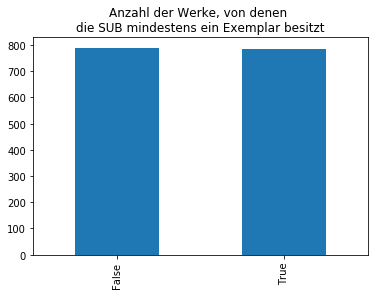

In [37]:
publications_all_authors_df["nach_bookLabel.value_last_section_surname_Bestand_Göttingen_cat"].value_counts().plot.bar(title="Anzahl der Werke, von denen \ndie SUB mindestens ein Exemplar besitzt")

In [38]:
publications_all_authors_df

,index,book.type,book.value,article.type,article.value,linkCount.datatype,linkCount.type,linkCount.value,gndId.type,gndId.value,...,nach_bookLabel.value_Bestand_Göttingen,nach_bookLabel.value_Ort_Göttingen,nach_bookLabel.value_Medium_Göttingen,nach_bookLabel.value_URL_GUK,error_nach_title,nach_bookLabel.value_last_section_surname_Bestand_Göttingen,nach_bookLabel.value_last_section_surname_Ort_Göttingen,nach_bookLabel.value_last_section_surname_Medium_Göttingen,nach_bookLabel.value_last_section_surname_URL_GUK,nach_bookLabel.value_last_section_surname_Bestand_Göttingen_cat
0,0,uri,http://www.wikidata.org/entity/Q691007,uri,https://en.wikipedia.org/wiki/Corpus_Inscripti...,http://www.w3.org/2001/XMLSchema#integer,literal,22,literal,4222745-8,...,136,BBK-ALTH|7/023,AFu|AFua|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,18,7/021|7/155,AFu|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,True
1,1,uri,http://www.wikidata.org/entity/Q1500229,uri,https://en.wikipedia.org/wiki/History_of_Rome_...,http://www.w3.org/2001/XMLSchema#integer,literal,12,NaN,NaN,...,806,BBK-KLASS|FMAG|7/021|7/041|LS1,AFu|Aau|Oau|Afu|Aax,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,False
2,0,uri,http://www.wikidata.org/entity/Q2421868,uri,https://en.wikipedia.org/wiki/Synn%C3%B8ve_Sol...,http://www.w3.org/2001/XMLSchema#integer,literal,10,NaN,NaN,...,6,7/138|HG-MAG,AFu|Aau|Aar|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,5,7/138|HG-MAG,AFu|Aau|Aar|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,True
3,1,uri,http://www.wikidata.org/entity/Q11967371,uri,https://en.wikipedia.org/wiki/En_fallit,http://www.w3.org/2001/XMLSchema#integer,literal,3,NaN,NaN,...,3,7/138,AFu|Afr|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,3,7/138,AFu|Afr|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,True
4,2,uri,http://www.wikidata.org/entity/Q11967394,uri,https://en.wikipedia.org/wiki/En_glad_Gut,http://www.w3.org/2001/XMLSchema#integer,literal,3,NaN,NaN,...,3,7/138|HG-MAG,AFu|Aar|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,3,7/138|HG-MAG,AFu|Aar|Afu,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,5,uri,http://www.wikidata.org/entity/Q108830528,uri,https://en.wikipedia.org/wiki/Afterlives,http://www.w3.org/2001/XMLSchema#integer,literal,4,NaN,NaN,...,56,BBK-HIST|ALS1|FMAG,Aax|Aau|Oax,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,False
1572,6,uri,http://www.wikidata.org/entity/Q108837890,uri,https://en.wikipedia.org/wiki/Pilgrims_Way_(no...,http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,...,20,7/066,Eaxkr|Aan|Aar|Aau|Oaxkr|Oaxkf|Oax,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,False
1573,7,uri,http://www.wikidata.org/entity/Q108837913,uri,https://en.wikipedia.org/wiki/Admiring_Silence,http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,...,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,False
1574,8,uri,http://www.wikidata.org/entity/Q108839999,uri,https://en.wikipedia.org/wiki/Dottie_(novel),http://www.w3.org/2001/XMLSchema#integer,literal,2,NaN,NaN,...,1,,Ean,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN,0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,False


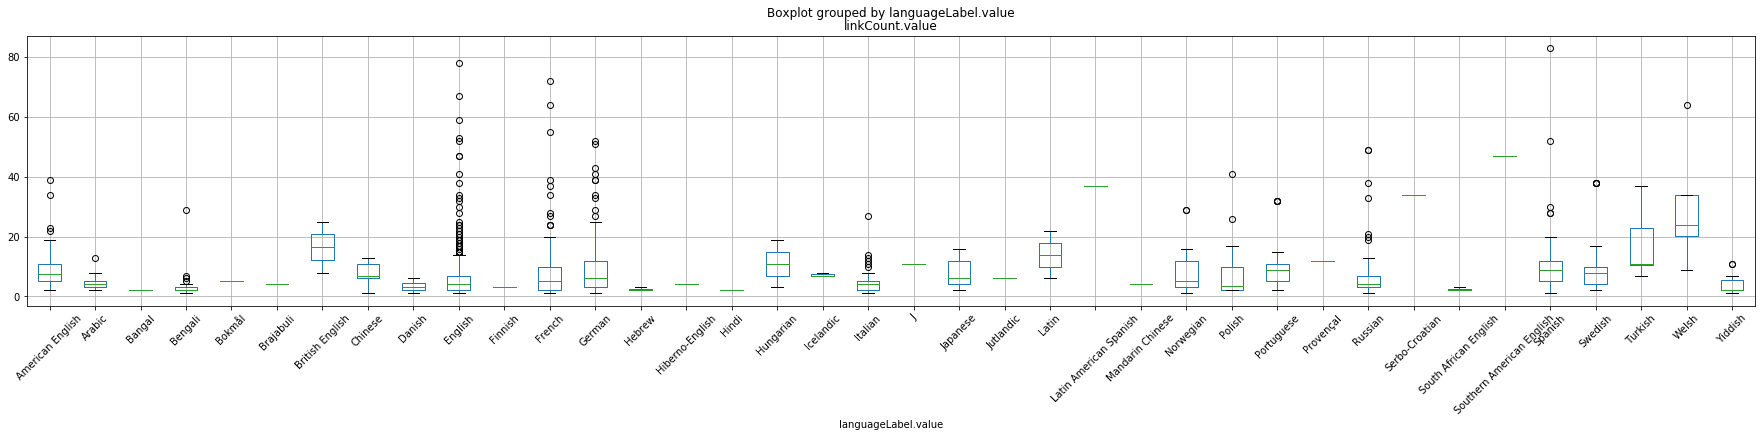

In [39]:
publications_all_authors_df.boxplot("linkCount.value", by="languageLabel.value", figsize=(30,5), rot=45)

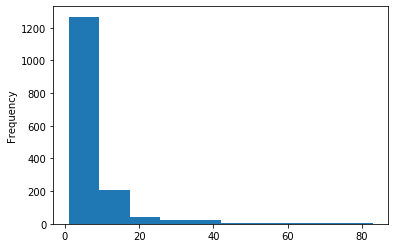

In [40]:
publications_all_authors_df["linkCount.value"].plot.hist()


In [41]:
publications_all_authors_df["gndId.value"].notna().sum()

232